In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.

Min-Max scaling is a form of Normalization that is applied on numerical dataset in order to scale down the values of the different imput variables which may have a direct impact on the model being fit to the dataset. Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1. A value is normalized as follows:

$$y = \frac{x - x_{min}}{x_{max} - x_{min}}$$

**Drawback** - We can see that if an x value is provided that is outside the bounds of the minimum and maximum values, the resulting value will not be in the range of 0 and 1. We could check for these observations prior to making predictions and either remove them from the dataset or limit them to the pre-defined maximum or minimum values.

#### Example of Min-Max Scaling

In [2]:
tips_df = sns.load_dataset("tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Lets try to Normalize the "total_bill" variable

In [3]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

total_bill__minmax_normalized = pd.DataFrame(data = min_max_scaler.fit_transform(tips_df[["total_bill"]]), 
                                     columns=["total_bill_normalized"])
total_bill__minmax_normalized

,total_bill_normalized
0,0.291579
1,0.152283
2,0.375786
3,0.431713
4,0.450775
...,...
239,0.543779
240,0.505027
241,0.410557
242,0.308965


## Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.

**Unit Vector Feature Scaling** - Unit Vector Scaling technique is done considering the whole feature vector to be of unit length. Unit vector scaling means dividing each component by the Euclidean length of the vector (L2 Norm). Unit Vector technique produces values of range [0,1].  When dealing with features with hard boundaries, this is quite useful. **Example** - when dealing with image data, the colors can range from only 0 to 255. The formula for Unit Vector scaling technique is:

$$y = \frac{x}{\sqrt(sum(val ^ 2)}$$

In comparison to Min-Max scaling, Unit Vector scaling is more useful in cases where we want to preserve the direction of the data, such as in Text Classification or Natural Language Processing(NLP).

#### Example of Unit Vector Scaling

In [4]:
# Let's scale the "distance", "fare", "tip" of the taxis dataframe using Unit vector Scaling technique
taxis_df = sns.load_dataset("taxis")
taxis_df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [5]:
from sklearn.preprocessing import normalize

features = ["distance", "fare", "tip"]
columns = ["distance_unit_normal", "fare_unit_normal", "tip_unit_normal"]
taxis_unit_normalize = pd.DataFrame(data = normalize(taxis_df[features]), columns=columns)
taxis_unit_normalize.head()

,distance_unit_normal,fare_unit_normal,tip_unit_normal
0,0.213461,0.933894,0.286839
1,0.156064,0.987747,0.000000
2,0.171657,0.939731,0.295702
3,0.267899,0.939386,0.213971
4,0.231742,0.965592,0.118017


## Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.

**PCA(Principal Component Analysis)** - Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation. These new transformed features are called the Principal Components. It is a technique to draw strong patterns from the given dataset by reducing the variances. PCA generally tries to find the lower-dimensional surface to project the high-dimensional data.

PCA works by considering the variance of each attribute because the high attribute shows the good split between the classes, and hence it reduces the dimensionality. ome real-world applications of PCA are image processing, movie recommendation system, optimizing the power allocation in various communication channels. It is a feature extraction technique, so it contains the important variables and drops the least important variable.

Some properties of these principal components are given below:

1. The **principal component** must be the linear combination of the original features.
2. These components are orthogonal, i.e., the correlation between a pair of variables is zero.
3. The importance of each component decreases when going to 1 to n, it means the 1 PC has the most importance, and n PC will have the least importance.

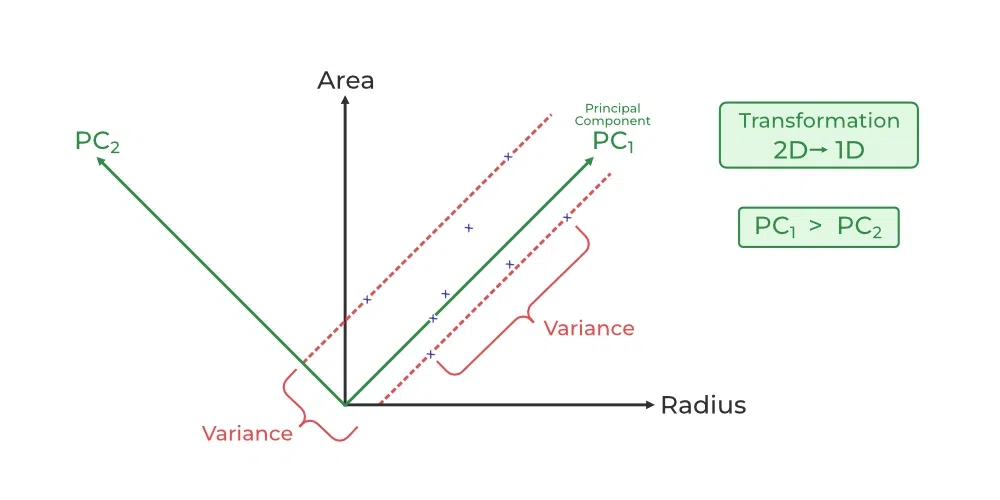

#### PCA in Python

In [6]:
# Importing the dataset
from sklearn.datasets import load_breast_cancer

# instantiating
cancer = load_breast_cancer(as_frame=True)

# Creating a dataframe
df = cancer.frame

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
# Getting the shapes of the dataset
print(f"Original shape of data = {df.shape}")

X = df[cancer["feature_names"]]
print(f"Feature shape = {X.shape}")

Original shape of data = (569, 31)
Feature shape = (569, 30)


#### Now we will apply the first most step which is to standardize the data and for that, we will have to first calculate the mean and standard deviation of each feature in the feature space.

In [8]:
X_mean = X.mean()
X_std = X.std()

Z = (X - X_mean) / X_std

Z.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


#### The covariance matrix helps us visualize how strong the dependency of two features is with each other in the feature space.

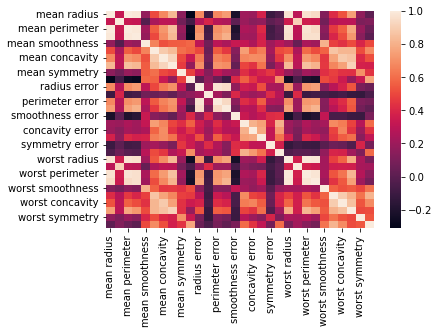

In [9]:
# Calculating the covariance
cov = Z.cov()

# Plotting the covariance for better visualization
import matplotlib.pyplot as plt

sns.heatmap(cov)
plt.show()

#### Now we will compute the eigenvectors and eigenvalues for our feature space which serve a great purpose in identifying the principal components for our feature space.

In [10]:
eigen_values, eigen_vectors = np.linalg.eig(cov)

print('Eigen values:\n', eigen_values)
print('Eigen values Shape:', eigen_values.shape)
print('Eigen Vector Shape:', eigen_vectors.shape)

Eigen values:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Eigen values Shape: (30,)
Eigen Vector Shape: (30, 30)


#### Sort the eigenvalues in descending order and sort the corresponding eigenvectors accordingly.

In [11]:
# Index the eigenvalues in descending order
idx = eigen_values.argsort()[::-1]

eigen_values = eigen_values[idx]

eigen_vector = eigen_vectors[:, idx]

#### Explained variance is the term that gives us an idea of the amount of the total variance which has been retained by selecting the principal components instead of the original feature space.

In [12]:
explained_var = np.cumsum(eigen_values) / np.sum(eigen_values)
explained_var

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

#### <u>Determine the Number of Principal Components  </u>
#### Here we can either consider the number of principal components of any value of our choice or by limiting the explained variance. Here I am considering explained variance more than equal to 50%. Let’s check how many principal components come into this.

In [13]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components

2

#### <u>Project the Data onto the Selected Principal Components</u>
#### 1. Find the projection matrix, It is a matrix of eigenvectors corresponding to the largest eigenvalues of the covariance matrix of the data. it projects the high-dimensional dataset onto a lower-dimensional subspace
#### 2. The eigenvectors of the covariance matrix of the data are referred to as the principal axes of the data, and the projection of the data instances onto these principal axes are called the principal components. 

In [14]:
# PCA component or unit matrix
u = eigen_vectors[:,:n_components]
pca_component = pd.DataFrame(u,
                             index = cancer['feature_names'],
                             columns = ['PC1','PC2']
                            )
pca_component

,PC1,PC2
mean radius,0.218902,-0.233857
mean texture,0.103725,-0.059706
mean perimeter,0.227537,-0.215181
mean area,0.220995,-0.231077
mean smoothness,0.142590,0.186113
mean compactness,0.239285,0.151892
mean concavity,0.258400,0.060165
mean concave points,0.260854,-0.034768
mean symmetry,0.138167,0.190349
mean fractal dimension,0.064363,0.366575


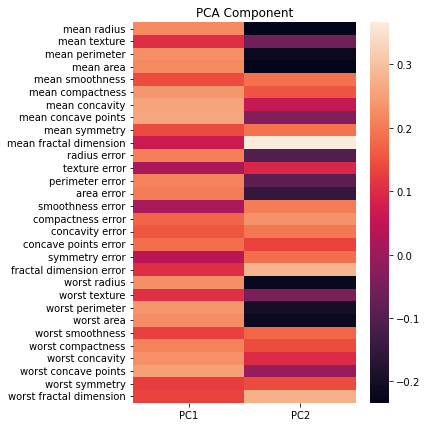

In [15]:
# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

#### Dimensionality reduction is then obtained by only retaining those axes (dimensions) that account for most of the variance, and discarding all others.

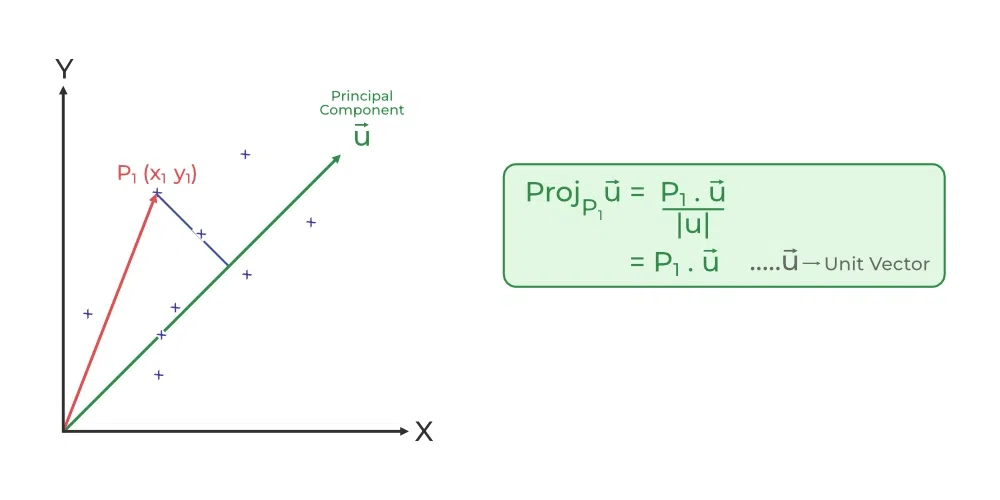

In [16]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
# Print the  Pricipal Component values
print(Z_pca)

          PCA1       PCA2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


#### PCA in Python using Scikit Learn

In [17]:
# Importing PCA
from sklearn.decomposition import PCA
 
# Let's say, components = 2
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(Z)
x_pca = pca.transform(Z)
 
# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])
print(df_pca1)

           PC1        PC2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


## Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.

Principal Component Analysis acronymed as **PCA** is a form of Feature Extraction technique which is used mainly for the bewlow mentioned purposes:

1. To avoid the **CURSE OF DIMENSIONALITY**. This means it helps to reduce the number of features for any dataset when required because too many features with less data points would lead to overfitting of the model.

2. In addition to avoiding Curse of Dimensionality, it also captures the largest variance of the data along the Principal Components which can be helpful in distinguishing the data points.

3. The Principal Components identified by the PCA are independent features which help in fitting the generalized version of the model and getting rid of unneccessary features.

### Example of PCA for Feature Extraction 

In [18]:
credit_df = pd.read_csv("./creditcard.csv")
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
X = credit_df.drop(labels=["Class"], axis = 1)
Y = credit_df["Class"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)
X_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [20]:
from sklearn.decomposition import PCA

# PCA will consider only those components which have an explained variance > 90%
pca = PCA(n_components=0.9, svd_solver="full")
pca.fit(X_scaled)

X_pca = pd.DataFrame(pca.transform(X))
print("Variance Ratio:", pca.explained_variance_ratio_)

X_pca

Variance Ratio: [0.06527521 0.05612313 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333]


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,105.986132,2.148992,-0.845366,-0.391598,0.885074,-0.239440,-1.163225,-0.623403,-0.255497,-0.825847,...,0.491596,0.063634,0.110421,0.903649,0.019131,0.239115,-0.054660,-0.045783,0.542480,-0.663368
1,1.548689,-0.485835,-0.509710,-0.018623,-0.788263,0.528307,0.641367,0.310957,0.401176,0.482163,...,0.383183,-0.016138,-0.399831,-0.336497,0.214252,-0.175080,0.317782,0.254799,-0.267914,-0.152420
2,268.926178,8.601747,-0.096794,1.440325,0.358512,-0.314261,-2.680662,0.213738,-0.591222,1.407699,...,0.411678,1.449025,-1.057434,0.628001,0.835486,-0.396203,0.898739,-0.724204,1.072814,-0.033914
3,87.472009,3.200438,0.028484,-0.274995,0.498834,-0.983076,-2.251740,0.983686,-1.201414,0.283327,...,0.222311,0.793458,-0.356349,-0.722694,-0.360068,0.587351,-0.387573,0.635975,-0.422964,-0.056343
4,49.320738,2.712621,0.345560,-0.521826,1.040812,-0.477859,-0.406088,-0.974544,-0.877509,-1.111953,...,0.718976,0.617392,0.095279,0.776623,-0.847137,0.440935,-0.338626,-0.366053,-0.083138,0.178849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-5123.509963,122069.193635,-1.606024,2.787884,-0.258240,0.398625,-1.538288,-2.403127,1.826221,-5.185600,...,-0.414156,-0.882472,-3.404219,-2.153535,1.099037,-7.363578,0.474780,-6.520727,-10.615424,9.231928
284803,-5105.311623,122068.195018,0.021263,0.668613,0.474540,0.232838,-1.101627,0.598288,-0.716308,0.147299,...,0.065530,0.618554,-0.766304,1.771539,1.301287,0.884414,-0.049183,0.237614,0.303345,-0.408124
284804,-5074.835923,122072.402376,0.299712,0.845843,-1.834512,1.071445,0.069894,2.452576,-0.949125,1.571618,...,0.177121,0.283211,0.321681,-0.499436,1.831958,0.612956,1.498923,-0.402035,0.580698,0.349351
284805,-5115.843318,122069.068658,-0.190879,-1.273076,0.092690,-0.587277,-0.714113,-0.188964,-0.718610,-1.262373,...,0.284267,-1.554481,0.354443,0.220739,0.130097,-1.042421,-1.159371,-0.100555,1.086594,0.321487


We can observe that the number of features have been reduced from 30 to 26 and these many features or Principal components have an explained variance of more than 90%.

## Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.

Min-Max scaling is a form of Normalization that can be applied on Numerical variables only. Min-Max scaling brings the values of any numerical column between [0,1]. The formula for Min-Max Scaling is:

$$y = \frac{x - x_{min}}{x_{max} - x_{min}}$$

But here, we are going to use Scikit Learn's library to use MinMaxScaler

In [21]:
food_df = pd.DataFrame(data={
    "item":["biriyani", "pizza", "burger", "fried chicken", "momo"],
    "price":[250, 380, 199, 157, 100],
    "rating":[5, 2, 3, 4, 3],
    "delivery_time":[40, 30, 20, 25, 15]
})
food_df

,item,price,rating,delivery_time
0,biriyani,250,5,40
1,pizza,380,2,30
2,burger,199,3,20
3,fried chicken,157,4,25
4,momo,100,3,15


In [22]:
df_num = food_df.drop(columns="item", axis = 1, inplace=False)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_num)
df_num = pd.DataFrame(scaler.transform(df_num), columns= df_num.columns)
df_num

,price,rating,delivery_time
0,0.535714,1.000000,1.0
1,1.000000,0.000000,0.6
2,0.353571,0.333333,0.2
3,0.203571,0.666667,0.4
4,0.000000,0.333333,0.0


By applying Min-Max scaling to the numerical features, we ensure that the different features are on a similar scale, which can help improve the performance of machine learning models and recommendation algorithms that use the data.

## Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.

The model is tor predict stock prices given the feature variables such as financial_data, market_trends, etc. Now since there could be a lot of features corresponding to each data point, there could be a high possibility of the model being overfitted. Now in order to avoid such a scenario, we would need to perform dimensionality reduction using PCA which in turn would also help in generalizing the model. The steps required to perform PCA are discussed as below:

1. First, we would need to separate out the feature variables and the target column.
2. Then, we would need to convert categorical variables to numerical features by encoding them as PCA doesn't work with categorical variables.
3. After that, we would need to perform Standardization technique on each of these columns so that all of them have 0 mean and 1 standard deviation. As a result, the data would be spread around the origin. This step could be performed manually or using Scikit learn library.
4. Then we would need to find the **Covariance Matrix**, which would help in visualizing which features show maximum variance when compared to other features.
5. **Compute the eigenvectors and eigenvalues:** We then calculate the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the directions in which the data varies the most, while the eigenvalues represent the magnitude of the variance.
6. In this step, we would import PCA from Scikit learn library and initialise an object of PCA. For initialiation, we would need either the number of principal components that needed to be preserved or the explained variance value(between 0 and 1), so that PCA could itself find out what are all the features that could be maintained that gives the maximum variance. Then we would **"fit"** the PCA to the scaled version of data.
7. Then we could apply the **"transform"** method to apply the PCA over the data. This would actually project the actual data on the principal components being derived earlier.

## Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.

In [26]:
arr = np.array([1, 5, 10, 15, 20])

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

scaler.fit_transform(arr.reshape(-1, 1))

array([[-1.        ],
       [-0.57894737],
       [-0.05263158],
       [ 0.47368421],
       [ 1.        ]])

## Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?

The number of Principal Components to be chosen based on the explained variance of each of these components. The components which explain most of the variance are usually preserved in order to differentiate the data.

In [55]:
# Preparing the data
height = np.random.normal(loc=150, scale=20, size=1000)
weight = np.random.normal(loc=180, scale=30, size=1000)
age = np.random.normal(loc=30, scale=5, size=1000)
gender = np.random.choice(a=["Male","Female"], size=1000)
blood_pressure = np.random.normal(loc=120, scale=10, size= 1000)

df = pd.DataFrame({'Height': height, 
                     'Weight': weight, 
                     'Age': age, 
                     'Gender': gender, 
                     'Blood Pressure': blood_pressure})

df.head()

,Height,Weight,Age,Gender,Blood Pressure
0,150.815452,187.845890,27.776922,Male,113.069829
1,100.851878,198.554094,23.040678,Male,123.711226
2,162.092139,146.121346,31.103087,Male,131.058865
3,147.682739,171.373468,36.819852,Female,118.292546
4,179.200950,170.549049,34.010456,Male,112.514311


In [57]:
# Separating the categorical and numerical variables
cat = list(df.columns[df.dtypes == "object"])
numerical = list(df.columns[df.dtypes != "object"])

print(f"The numerical features are: {numerical}")
print(f"The categorical features are: {cat}")

The numerical features are: ['Height', 'Weight', 'Age', 'Blood Pressure']
The categorical features are: ['Gender']


In [75]:
# Converting categorical variable to numerical
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df[cat])
df[cat[0]] = encoder.transform(np.array(df[cat]).ravel()).ravel()
df.head()

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Height,Weight,Age,Gender,Blood Pressure
0,150.815452,187.845890,27.776922,1,113.069829
1,100.851878,198.554094,23.040678,1,123.711226
2,162.092139,146.121346,31.103087,1,131.058865
3,147.682739,171.373468,36.819852,0,118.292546
4,179.200950,170.549049,34.010456,1,112.514311


In [76]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), columns=df.columns)
df.head()

,Height,Weight,Age,Gender,Blood Pressure
0,0.052113,0.303998,-0.465158,0.974329,-0.715718
1,-2.387082,0.660784,-1.409898,0.974329,0.354153
2,0.602635,-1.086220,0.198314,0.974329,1.092874
3,-0.100824,-0.244846,1.338640,-1.026347,-0.190634
4,1.437878,-0.272315,0.778248,0.974329,-0.771569


In [79]:
# Performing PCA
from sklearn.decomposition import PCA

comp = 3
pca = PCA(n_components=comp)

pca.fit(df)

final_df = pd.DataFrame(pca.transform(df), columns=['PC{}'.
                       format(i+1)
                        for i in range(comp)])
final_df

,PC1,PC2,PC3
0,0.794265,0.636044,0.017582
1,1.427879,0.432486,-2.471720
2,0.534281,-1.460675,0.792750
3,-1.469654,0.241400,0.456064
4,0.148590,0.303425,1.824631
...,...,...,...
995,0.103180,0.875632,-0.068380
996,0.854227,-2.024936,-0.839412
997,-0.620591,1.007710,-0.097238
998,0.010178,-0.086165,-0.894723
